# Matt Litz (msl2t) and Mike Wetklow (mw8hu)
# DS 6040 Project Starter Notebook
# April 2, 2022

## PART ONE:  Exploratory Data Analysis

In [58]:
#load Libraries
import sys
import numpy as np
import csv
import pandas as pd
#import lazypredict
import sklearn
#!conda install --yes --prefix {sys.prefix} pandas-profiling
#from pandas_profiling import ProfileReport
# Resource on how to fix error for different versions of python
# https://stackoverflow.com/questions/68704002/importerror-cannot-import-name-abcindexclass-from-pandas-core-dtypes-generic
#import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
#import lazypredict
#from lazypredict.Supervised import LazyClassifier

In [59]:
##Load files
# Instructions for understanding data can be found at
#https://facides.census.gov/Files/2019-2021%20Checklist%20Instructions%20and%20Form.pdf
gen21=pd.read_csv("gen21.csv") # Contains general audit data (DBKEY One to One)
gen21_lazy=pd.read_csv("gen21_lazy.csv") # Contains general audit data (DBKEY One to One)
findings21=pd.read_csv("findings21.csv") # Contains general audit categorical data (DBKEY One to Many)

# Instructions for understanding data can be found at
#https://facides.census.gov/Files/2019-2021%20Checklist%20Instructions%20and%20Form.pdf

## Data Wrangling to Explode Findings

In [ ]:
# Data Wrangling for findings21 source dataframe.
#put columns in list to make grouping easier later
#columns=list(findings21.columns)
#function checks for each of the compliance dimensions in the TYPEREQUIREMENT variable and adds/explodes to separate columns
compliance=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","P"]
df=findings21
for x in compliance:
    df[x] = np.where(df['TYPEREQUIREMENT'].str.contains(x), 1, 0)
#write csv
findings21.to_csv("findings21_exploded.csv")

In [60]:
#Reviewed the results and removed columns by hand, i.e., by excel
findings21_exp_lazy=pd.read_csv("findings21_exploded_lazy.csv") # Contains general audit categorical data (DBKEY One to Many)

## Pandas Report General Info 2021

In [9]:
# Pandas Profile Report for GEN_21_datacat
#gen21_rep = ProfileReport(gen21)
#gen21_rep

NameError: name 'ProfileReport' is not defined

## Multicollinearity General Information 2021

In [6]:
#code source:  https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = gen21_lazy[['TYPEREPORT_MP', 'MATERIALWEAKNESS_MP', 'REPORTABLECONDITION_MP', 'QCOSTS', 'ENTITY_CAT', 'STATE_REG', 
                'AGENCY_CAT', 'DOLLAR_CAT', 'CYFINDINGS', 'PYSCHEDULE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

ModuleNotFoundError: No module named 'statsmodels'

## Lazy Learner 2021 General Information

In [61]:
#Set Class_Val_num as response variable target and all other variables as predictors.
target = 'TYPEREPORT_MP'
X = gen21_lazy.loc[:,gen21_lazy.columns != target]
y = gen21_lazy.loc[:,gen21_lazy.columns == target]

In [ ]:
# Set up training and testing data set with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

<IPython.core.display.Javascript object>

In [ ]:
# lazyClassifer Algorithm
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:32<00:00,  1.11s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.93,0.93,0.93,0.95,0.03
GaussianNB,0.91,0.91,0.91,0.94,0.02
NearestCentroid,0.95,0.87,0.87,0.96,0.02
LinearDiscriminantAnalysis,0.97,0.86,0.86,0.97,0.04
BernoulliNB,0.96,0.85,0.85,0.97,0.02
BaggingClassifier,0.98,0.70,0.70,0.98,0.11
KNeighborsClassifier,0.98,0.70,0.70,0.98,0.88
XGBClassifier,0.98,0.68,0.68,0.98,1.04
LGBMClassifier,0.98,0.66,0.66,0.98,0.14


## Pandas Report Detailed Findings Data 2021

In [ ]:
# Pandas Profile Report for findings21 date
findings21_exploded_lazy=pd.read_csv("findings21_exploded_lazy.csv") # Contains general audit categorical data (DBKEY One to Many)
#findings_rep = ProfileReport(findings21_exploded_lazy)
findings_rep

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Multicollinearity General Information 2021

In [17]:
#code source:  https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor
findings21_exploded_lazy=pd.read_csv("findings21_exploded_lazy.csv")   
# the independent variables set
X = findings21_exploded_lazy[['MATERIALWEAKNESS', 'SIGNIFICANTDEFICIENCY', 'OTHERFINDINGS', 'QCOSTS', 'REPEATFINDING']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature       VIF
0       MATERIALWEAKNESS  1.154473
1  SIGNIFICANTDEFICIENCY  1.102060
2          OTHERFINDINGS  1.027994
3                 QCOSTS  1.092698
4          REPEATFINDING  1.259863


## Lazy Learner 2021 Findings

In [64]:
#Set Class_Val_num as response variable target and all other variables as predictors.
target = 'MODIFIEDOPINION'
X = findings21_exp_lazy.loc[:,findings21_exp_lazy.columns != target]
y = findings21_exp_lazy.loc[:,findings21_exp_lazy.columns == target]

In [ ]:
# Set up training and testing data set with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

<IPython.core.display.Javascript object>

In [ ]:
# lazyClassifer Algorithm
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:22<00:00,  1.27it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.69,0.83,0.83,0.77,0.03
XGBClassifier,0.96,0.80,0.80,0.96,0.44
LinearDiscriminantAnalysis,0.94,0.79,0.79,0.94,0.06
SVC,0.96,0.78,0.78,0.95,0.71
LGBMClassifier,0.96,0.78,0.78,0.95,0.13
Perceptron,0.95,0.78,0.78,0.95,0.03
BaggingClassifier,0.96,0.77,0.77,0.96,0.12
NearestCentroid,0.82,0.77,0.77,0.86,0.02
RandomForestClassifier,0.96,0.77,0.77,0.96,0.39


(array([20603.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   323.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

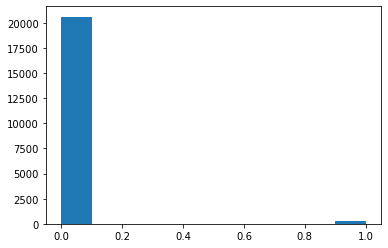

In [16]:
import matplotlib.pyplot as plt
plt.hist(y)

* TYPEREPORT_MP (Dependent):  Type of Major Program Audit Opinion, 0 for clean opinion, 1 for not clean
* MATERIALWEAKNESS_MP (Independent):  The major program included a material weakness (the most severe audit finding), 0 for no, 1 for yes
* REPORTABLECONDITION_MP (Independent): The major program included a reportable condition or significant deficiency (less severe than a material weakness audit finding) 0 for no, 1 for yes.
* QCOSTS (Independent):  The auditors identified questionable costs, 0 for no, 1 for yes.
* ENTITY_CAT (Independent):  Entity Category, 0 for tribe, 1 for Institution of Higher Education, 2 Local Government, 3 for Non Profit, 4 for State Government, and 5 for unknown.
* STATE_REG (Independent):  State Region where the Federal Funding goes, 0 for Northeast States, 1 for Midwest, 2 for South, 4 for West, 5 for US territory.
* AGENCY_CAT (Independent):  Agency Category, Created 12 categorical variables for top 11 Federal Agencies that provide grant funds that accounts for 9X% of the data.
* DOLLAR_CAT (Independent):  Created 7 categorical variables for the dollar size of the grant ranging from $750,000 to over $100,000,000
* CYFINDINGS (Independent): The audit finding is a current year audit finding, 0 for no, 1 for yes.
* PYSCHEDULE (Independent):  The audit finding was a prior year audit finding, 0 for no, 1 for yes.

(array([2.0046e+04, 4.5400e+02, 0.0000e+00, 1.4200e+02, 0.0000e+00,
        2.5600e+02, 8.0000e+00, 0.0000e+00, 1.4000e+01, 6.0000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

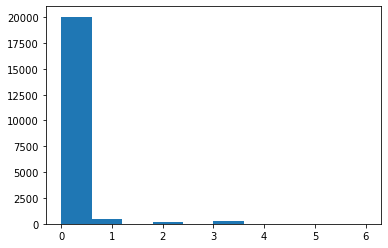

In [10]:
gen21_lazy
plt.hist(gen21_lazy['DOLLAR_CAT'])

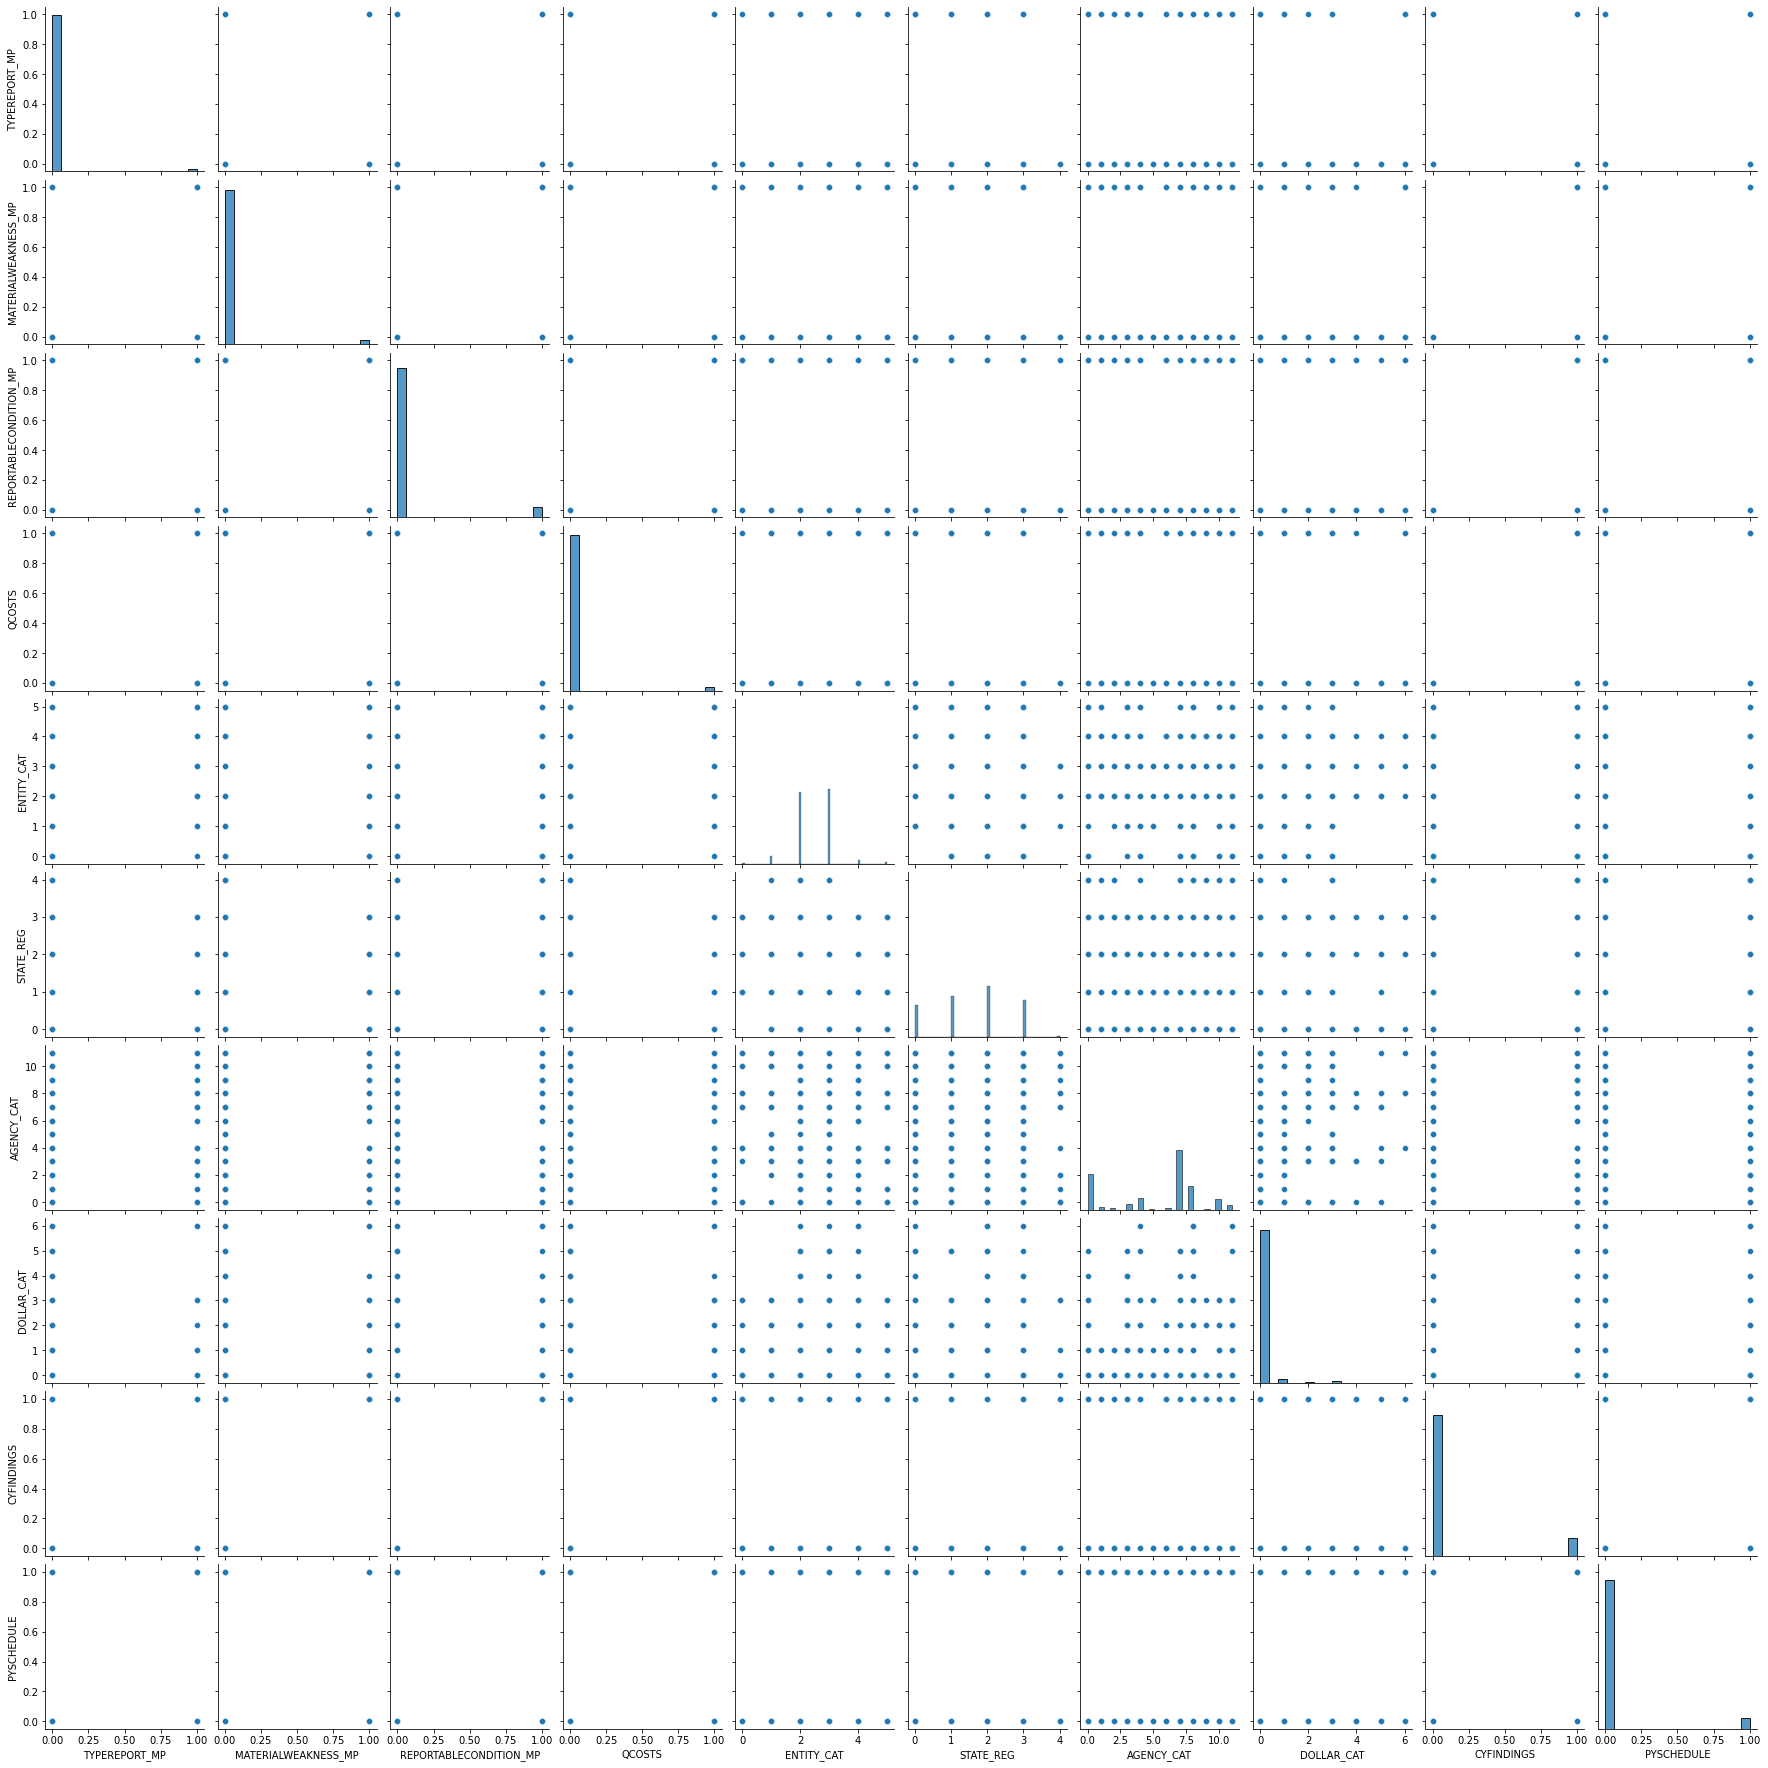

In [11]:
import seaborn as sns
g = sns.pairplot(gen21_lazy)

## Manuel Model

In [21]:
import pymc3 as pm

# The random variables for the unobserved parameters for intercept and 3 features are expressed using 
# uninformative priors that assume normal distributions with mean 0 and standard deviation of 100.

with pm.Model() as manual_logistic_model:
    # random variables for coefficients with
    # uninformative priors for each parameter

    intercept = pm.Normal('intercept', 0, sd=100)
    beta_1 = pm.Normal('beta_1', 0, sd=100)
    beta_2 = pm.Normal('beta_2', 0, sd=100)
    beta_3 = pm.Normal('beta_3', 0, sd=100)
    beta_4 = pm.Normal('beta_4', 0, sd=100)
    beta_5 = pm.Normal('beta_5', 0, sd=100)
    beta_6 = pm.Normal('beta_6', 0, sd=100)
    beta_7 = pm.Normal('beta_7', 0, sd=100)
    beta_8 = pm.Normal('beta_8', 0, sd=100)
    beta_9 = pm.Normal('beta_9', 0, sd=100)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    likelihood = pm.invlogit(intercept + beta_1 * gen21_lazy.MATERIALWEAKNESS_MP + beta_2 * gen21_lazy.REPORTABLECONDITION_MP + beta_3 * gen21_lazy.QCOSTS + 
    beta_4 * gen21_lazy.ENTITY_CAT + beta_5 * gen21_lazy.STATE_REG + beta_6 * gen21_lazy.AGENCY_CAT + beta_7 * gen21_lazy.DOLLAR_CAT + beta_8 * gen21_lazy.CYFINDINGS + 
    beta_9 * gen21_lazy.PYSCHEDULE)

    # Bernoulli random vector with probability of success
    # given by sigmoid function and actual data as observed
    pm.Bernoulli(name='logit', p=likelihood, observed=gen21_lazy.TYPEREPORT_MP)



In [22]:
manual_logistic_model.model

In [23]:
with manual_logistic_model:
    # compute maximum a-posteriori estimate
    # for logistic regression weights
    manual_map_estimate = pm.find_MAP()


In [24]:
def print_map(result):
    return pd.Series({k: np.asscalar(v) for k, v in result.items()})

print_map(manual_map_estimate)



intercept   -7.883251
beta_1       2.266479
beta_2       0.118193
beta_3       1.241757
beta_4       0.392146
beta_5       0.160548
beta_6      -0.069077
beta_7      -0.272403
beta_8       3.903975
beta_9      -0.060164
dtype: float64

In [ ]:
with pm.Model() as m:
  
    pm.glm.GLM.from_formula(
        'TYPEREPORT_MP ~ MATERIALWEAKNESS_MP + REPORTABLECONDITION_MP + QCOSTS + ENTITY_CAT + STATE_REG + AGENCY_CAT + DOLLAR_CAT + CYFINDINGS + PYSCHEDULE', data=gen21_lazy,
        priors={'Intercept': pm.Normal.dist(mu=0, sd=1),
                'MATERIALWEAKNESS_MP': pm.Normal.dist(mu=0, sd=1),
                'REPORTABLECONDITION_MP': pm.Normal.dist(mu=0, sd=1),
                'QCOSTS': pm.Normal.dist(mu=0, sd=1),
                'adiposity': pm.Normal.dist(mu=0, sd=1),
                'typea': pm.Normal.dist(mu=0, sd=1),
                'obesity': pm.Normal.dist(mu=0, sd=1),
                'alcohol': pm.Normal.dist(mu=0, sd=1),
                'age': pm.Normal.dist(mu=0, sd=1),
                'famhist': pm.Beta.dist(1, 1)
               }
        )
   # trace = pm.sample()
    trace = pm.sample(tune=1000,
                         draws=1000,
                         chains=4,
                         init = 'adapt_diag',
                         cores=6)

In [37]:

import pymc3 as pm


with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = 'TYPEREPORT_MP ~ MATERIALWEAKNESS_MP + REPORTABLECONDITION_MP + QCOSTS + ENTITY_CAT + STATE_REG + AGENCY_CAT + DOLLAR_CAT + CYFINDINGS + PYSCHEDULE', 
                            data = gen21_lazy, 
                            family = pm.glm.families.Binomial())

    #trace = pm.sample(500) 
    approx = pm.fit(50000, method = 'advi')
    trace = pm.sample(tune=1000,
                        draws=1000,
                        chains=4,
                        init = 'adapt_diag',
                        cores=6)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


Finished [100%]: Average Loss = 974.17
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [PYSCHEDULE, CYFINDINGS, DOLLAR_CAT, AGENCY_CAT, STATE_REG, ENTITY_CAT, QCOSTS, REPORTABLECONDITION_MP, MATERIALWEAKNESS_MP, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 311 seconds.


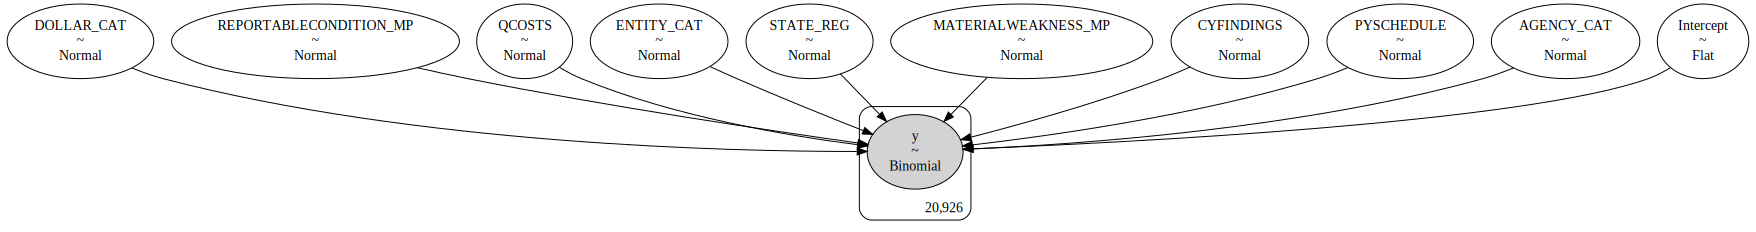

In [30]:
pm.model_to_graphviz(model)

In [31]:
pm.summary(trace)



Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-7.911,0.383,-8.655,-7.224,0.010,0.007,1599.0,1475.0,1.0
MATERIALWEAKNESS_MP,2.282,0.162,1.976,2.593,0.004,0.003,2049.0,2193.0,1.0
REPORTABLECONDITION_MP,0.118,0.160,-0.197,0.397,0.003,0.002,2111.0,2490.0,1.0
QCOSTS,1.252,0.153,0.973,1.546,0.003,0.002,2488.0,2846.0,1.0
ENTITY_CAT,0.392,0.092,0.218,0.566,0.002,0.001,2157.0,2428.0,1.0
STATE_REG,0.162,0.068,0.037,0.290,0.001,0.001,3313.0,2803.0,1.0
AGENCY_CAT,-0.070,0.020,-0.108,-0.034,0.000,0.000,2467.0,2859.0,1.0
DOLLAR_CAT,-0.285,0.138,-0.550,-0.039,0.003,0.002,3102.0,2412.0,1.0
CYFINDINGS,3.920,0.287,3.391,4.449,0.007,0.005,1760.0,2013.0,1.0
PYSCHEDULE,-0.072,0.151,-0.343,0.220,0.003,0.002,2378.0,2354.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


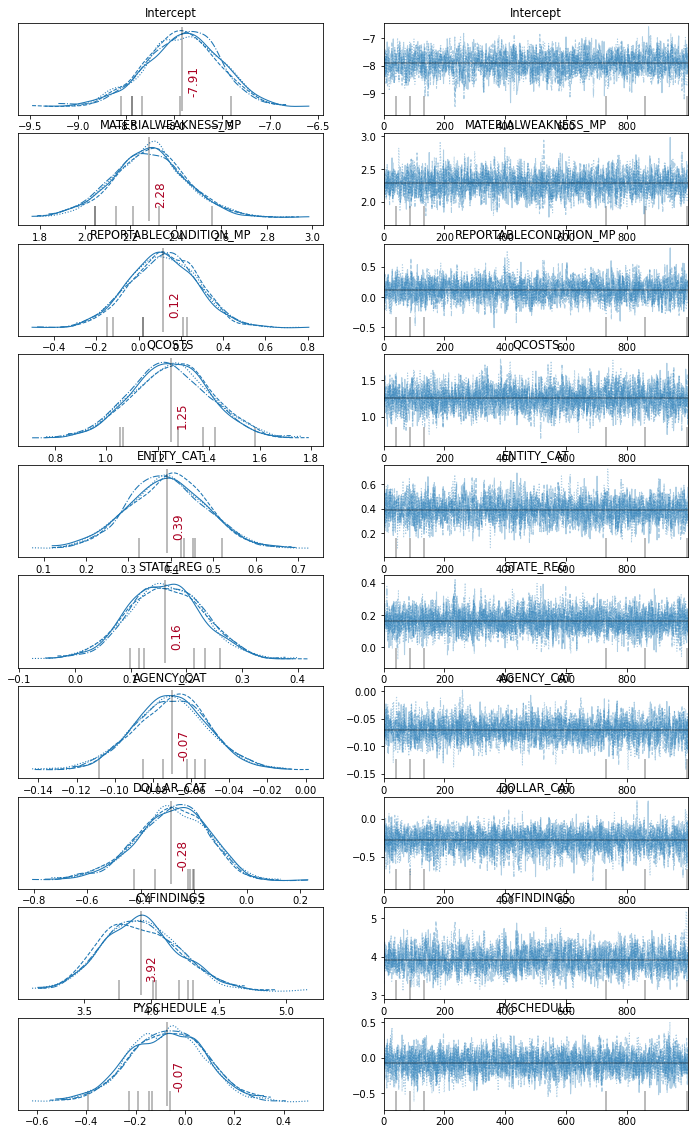

In [32]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')


plot_traces(trace)

In [33]:
draws = 100

trace_df = pm.trace_to_dataframe(trace).assign(
    chain=lambda x: x.index // draws)

trace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Intercept               4000 non-null   float64
 1   MATERIALWEAKNESS_MP     4000 non-null   float64
 2   REPORTABLECONDITION_MP  4000 non-null   float64
 3   QCOSTS                  4000 non-null   float64
 4   ENTITY_CAT              4000 non-null   float64
 5   STATE_REG               4000 non-null   float64
 6   AGENCY_CAT              4000 non-null   float64
 7   DOLLAR_CAT              4000 non-null   float64
 8   CYFINDINGS              4000 non-null   float64
 9   PYSCHEDULE              4000 non-null   float64
 10  chain                   4000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 343.9 KB


In [ ]:
with open(model_path / 'logistic_model_nuts.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model,
                 'trace': trace}, buff)

Got error No model on context stack. trying to find log_likelihood in translation.


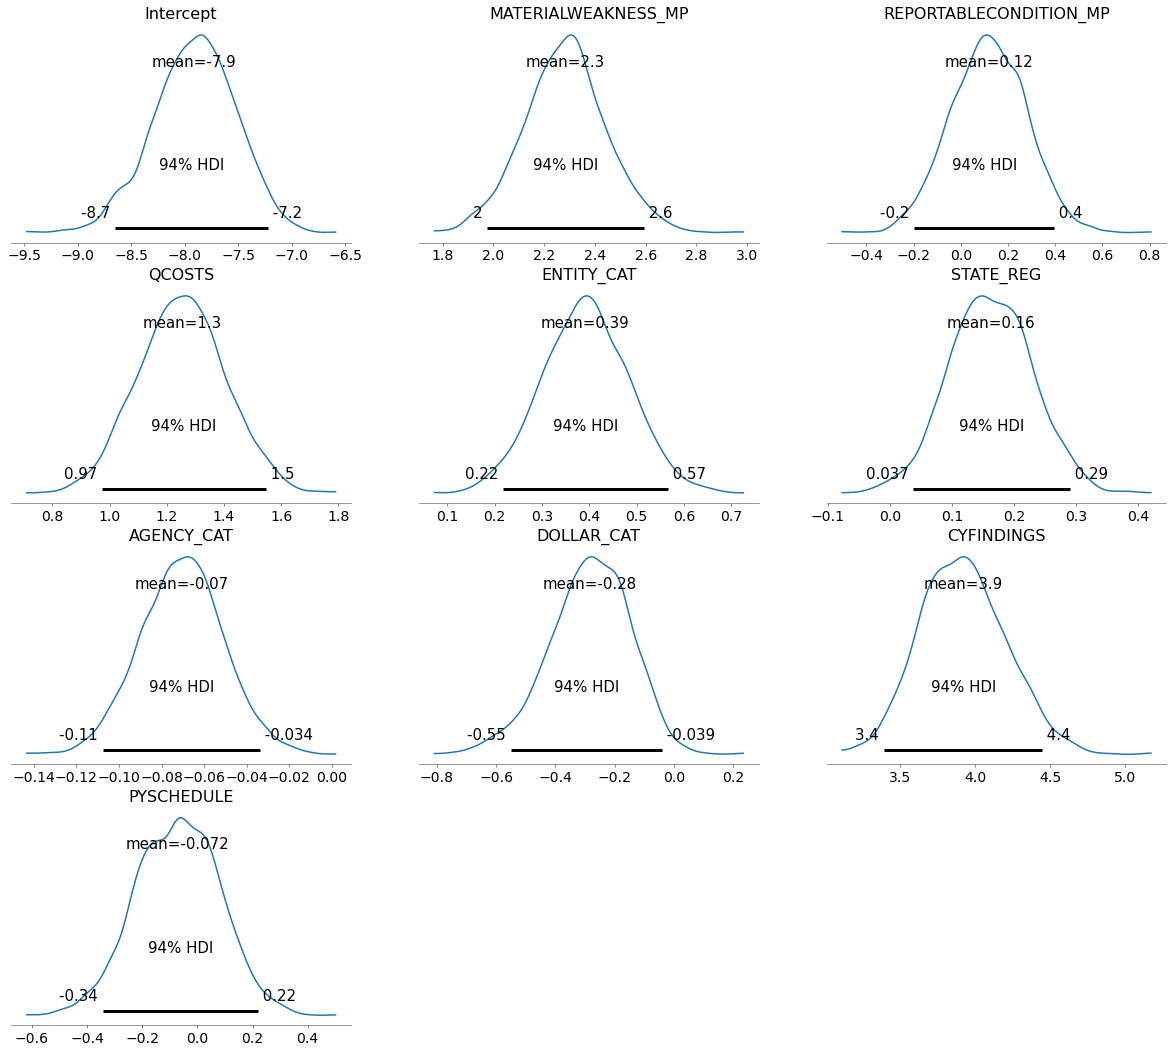

In [35]:
pm.plot_posterior(trace);

### Variational Inference

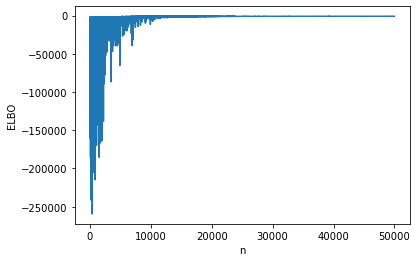

In [38]:
advi_elbo = pd.DataFrame(
    {'ELBO': -approx.hist,
     'n': np.arange(approx.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

In [39]:
trace_VI = approx.sample(draws=5000)

Got error No model on context stack. trying to find log_likelihood in translation.
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


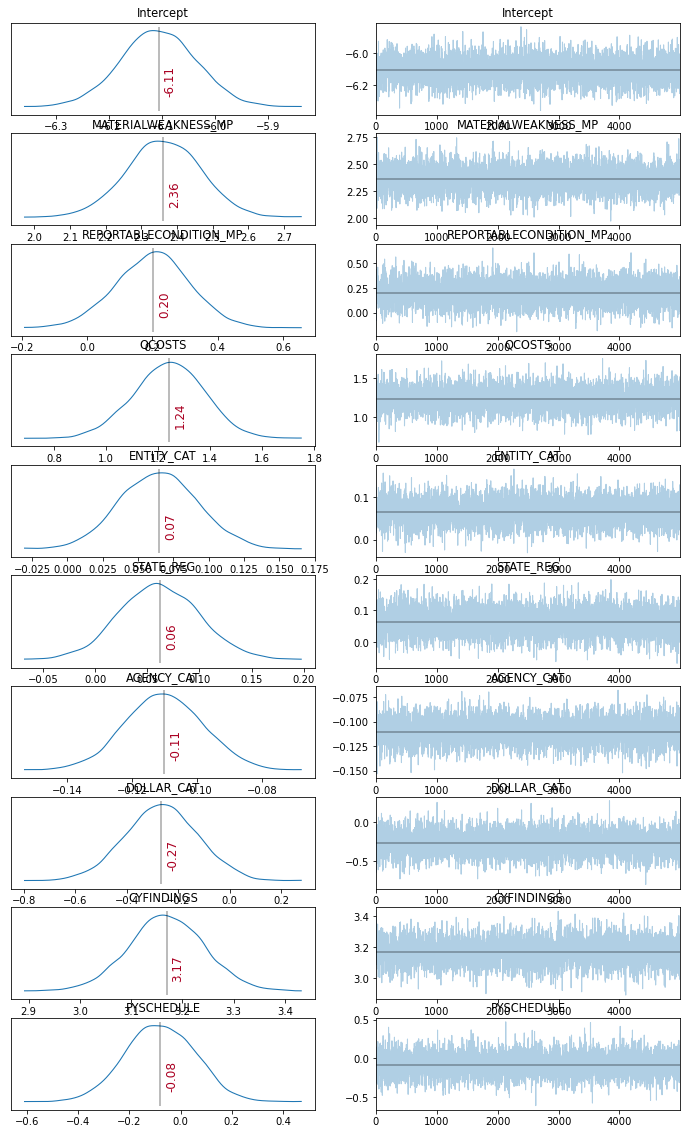

In [40]:
plot_traces(trace_VI)

Got error No model on context stack. trying to find log_likelihood in translation.


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

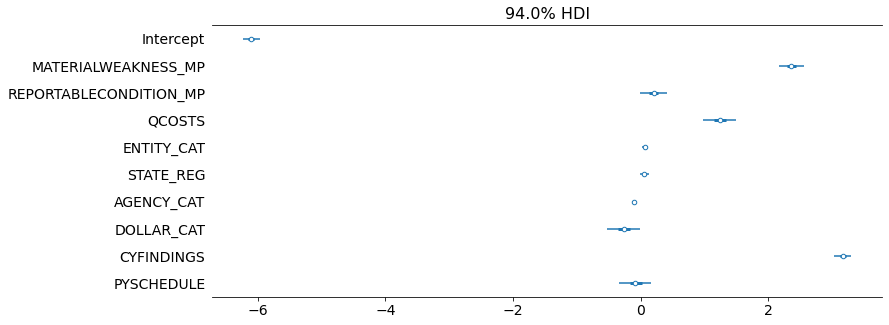

In [41]:
pm.plots.forestplot(trace_VI, figsize=(12, 5))

<Figure size 648x504 with 0 Axes>

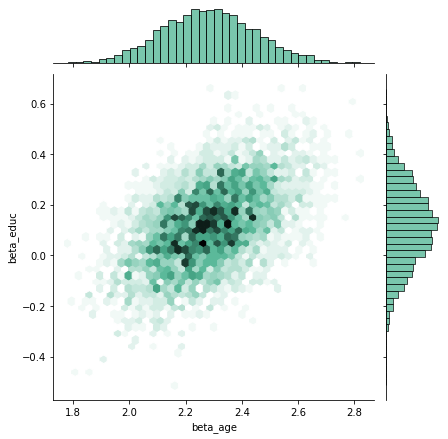

In [45]:
plt.figure(figsize=(9, 7))
sns.jointplot(trace["MATERIALWEAKNESS_MP"], trace["REPORTABLECONDITION_MP"], kind="hex", color="#4CB391")
plt.xlabel("beta_age")
plt.ylabel("beta_educ");

## QDA

In [47]:


gen21_lazy


,TYPEREPORT_MP,MATERIALWEAKNESS_MP,REPORTABLECONDITION_MP,QCOSTS,ENTITY_CAT,STATE_REG,AGENCY_CAT,DOLLAR_CAT,CYFINDINGS,PYSCHEDULE
0,0,0,0,0,0,3,8,3,0,0
1,0,0,1,0,0,3,8,3,1,1
2,0,0,0,0,0,3,8,0,0,0
3,0,0,0,0,0,3,0,0,0,0
4,0,0,1,0,0,3,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...
20921,0,0,0,0,5,3,11,0,0,0
20922,0,0,0,0,5,3,0,0,0,1
20923,0,0,0,0,5,3,8,0,0,0
20924,0,0,0,0,5,3,0,0,0,0


In [53]:
y_qda=gen21_lazy[['TYPEREPORT_MP']].to_numpy()
y_qda=gen21_lazy[['MATERIALWEAKNESS_MP', 'REPORTABLECONDITION_MP', 'QCOSTS', 'ENTITY_CAT', 'STATE_REG', 
                'AGENCY_CAT', 'DOLLAR_CAT', 'CYFINDINGS', 'PYSCHEDULE']].to_numpy()

print(X_qda)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [54]:
y_qda=gen21_lazy[['TYPEREPORT_MP']].to_numpy()
X_qda=gen21_lazy[['MATERIALWEAKNESS_MP', 'REPORTABLECONDITION_MP', 'QCOSTS', 'ENTITY_CAT', 'STATE_REG', 
                'AGENCY_CAT', 'DOLLAR_CAT', 'CYFINDINGS', 'PYSCHEDULE']].to_numpy()

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(priors=[0.1,0.9],
                                    store_covariance=True)
y_pred = qda.fit(X_qda, y_qda).predict(X_qda)



In [56]:
print(qda.predict([[0.8, 1]]))

ValueError: X has 2 features, but QuadraticDiscriminantAnalysis is expecting 9 features as input.

## findings21_exploded_lazy

In [62]:
findings21_exploded_lazy

NameError: name 'findings21_exploded_lazy' is not defined

In [66]:
target = 'MODIFIEDOPINION'
X = findings21_exp_lazy.loc[:,findings21_exp_lazy.columns != target]
y = findings21_exp_lazy.loc[:,findings21_exp_lazy.columns == target]

,MODIFIEDOPINION
0,0
1,0
2,0
3,0
4,1
...,...
14558,0
14559,0
14560,0
14561,0


In [67]:
import seaborn as sns
f = sns.pairplot(findings21_exp_lazy)

In [ ]:
import pymc3 as pm

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = 'TYPEREPORT_MP ~ MATERIALWEAKNESS_MP + REPORTABLECONDITION_MP + QCOSTS + ENTITY_CAT + STATE_REG + AGENCY_CAT + DOLLAR_CAT + CYFINDINGS + PYSCHEDULE', 
                            data = gen21_lazy, 
                            family = pm.glm.families.Binomial())

    #trace = pm.sample(500) 
    approx = pm.fit(50000, method = 'advi')
    trace = pm.sample(tune=1000,
                        draws=1000,
                        chains=4,
                        init = 'adapt_diag',
                        cores=6)